# Overview of data using View3D

or the initial overview of what has been measured and for viewing some features in the data, a quick 3D viewer can be initiated. This tutorial shows how to initialize it but not how the interactive parts work; for this see [Viewer3D documentation](../Data/Gui.html), the [dedicated tutorial](AdvancedView3DTutorial.html), or the in-depth explanation in [Interactivity](../../InDepthDocumentation/Interactivity.html). What is done when using the viewer is that all data from all provided files are binned in 3D pixels (voxels) of equal size independent of density of measured points. This does of course not reflect the actual data quality but gives quick insights into the data.

In [1]:
# Import of libraries needed
%matplotlib inline


from MJOLNIR.Data import DataSet
from MJOLNIR import _tools # Usefull tools useful across MJOLNIR
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# Loading and conversion of data

files = _tools.fileListGenerator('136,137', folder='C:/Users/lass_j/Documents/CAMEA2018',
                                    year=2018)

# Define the DataSet object and provide file(s)
ds = DataSet.DataSet(dataFiles=files)

# Run the converter. If no binning is specified MJOLNIR uses highest possible binning (currently 8)
ds.convertDataFile()


The viewer is an interactive widget which takes all of the data from the data files and bins them into voxel (3D pixels). One can view data from CAMEA as being in a 3D space; either with coordinates ($Q_x$, $Q_y$, $E$) or in the scattering plane ($H$, $K$, $L$, $E$). The binning makes sure that the x-axis of this cube of data is either along projection vector 1 (<code>rlu = True</code>) or $Q_x$ (<code>rlu = False</code>), with the y-axis 90$^\circ$ to the x-axis and the energy axis out of plane. 

The inputs for the method are

- dx: bin size along x-axis ($Q_x$ or projection vector 1)
- dy: bin size along y-axis ($Q_y$ or orthogonal to projection vector 1)
- dz: bin size along z-axis (Energy)

A couple of additional parameters can be set, e.g. if a grid should be plotted.

In [3]:
Viewer = ds.View3D(0.03,0.03,0.05, grid=True)

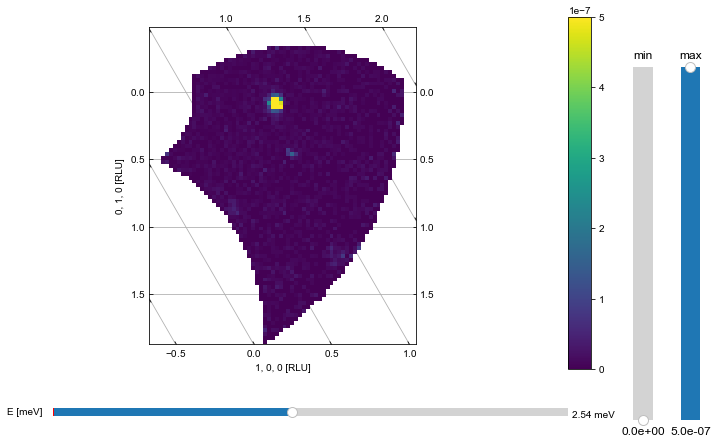

In [4]:
# Set plane programatically to a specific plane
Viewer.setPlane(20)
Viewer.set_clim(0,5e-7)
Viewer.ax.get_figure()

The above figure shows a constant energy cut at an energy transfer of 2.54 meV with the two axis (1,0,0) and (0,1,0) in the plane. Figuratively, one is looking at the cube of data from the top. 

If instead one would like to look at the data as a function of both scattering vector and energy transfer, this is done by pressing 0 or 1. The number signifies the axis (either projection vector 1 or orthogonal to it, respectively) that one steps through with the arrow keys. That is, in this specific example pressing 0 flips the data around so that the scattering vector (-1,-2,0) is along the x-axis and energy along the y-axis.

Moving the bottom slider to 1.06 then generates the following figure where the dispersion can be seen again.

C:\Anaconda\envs\python39\lib\site-packages\MJOLNIR\Data\Viewer3D.py:468: MatplotlibDeprecationWarning: The key_press_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('key_press_event', KeyEvent(...)) instead.
  self.figure.canvas.key_press_event(str(value))


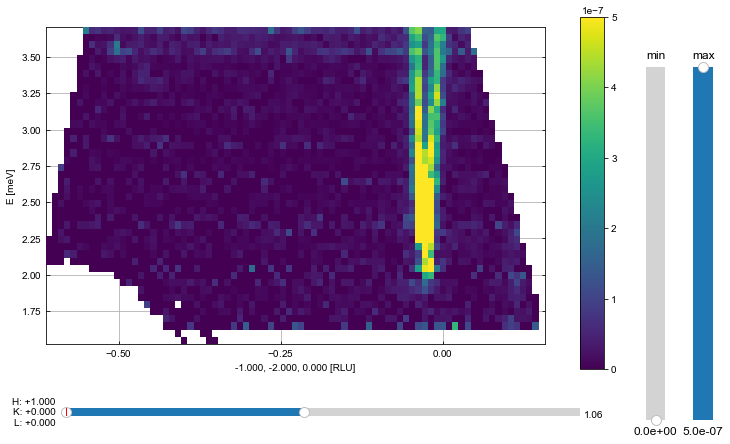

In [5]:
# Set projection programatically
Viewer.setProjection(0)
Viewer.setPlane(31)
Viewer.ax.get_figure()


Lastly, if one presses the 1 key, the data are plotted with the x-axis being (1,0,0) and the y-axis being the energy

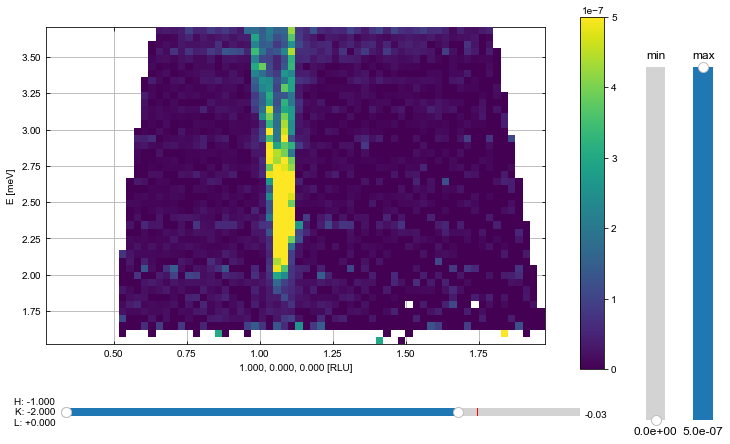

In [6]:
Viewer.setProjection(1)
Viewer.setPlane(61)
Viewer.ax.get_figure()

The reason for the unusual axis (-1,-2,0) being used is that it is 90$^\circ$ to the (1,0,0) axis and thus is the axis along which the data are binned when doing a regular voxel binning in 3D. Had the data been for a crystal with a 90$^\circ$ symmetry, i.e. tegragonal, and the scattering plane ($H$,$0$,$L$), the plotting axes would have been (1,0,0) and (0,0,1).

A small side note is that the alingment of this sample was not perfect and thus the dispersion is not located exactly on top of (1,0,0) as seen most easily in the two cut last cuts. 